In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from random import uniform

plt.rcParams["figure.figsize"] = (3,2)
df = pd.read_csv("aggsig.csv")
df.head()

,scheme,N,signatureSizeKB,publicKeySizeKB,privateKeySizeKB,timeToSign,timeToVerify
0,BLS,10,0.960,1.92,0.32,1,7
1,BGLS,10,0.096,1.92,0.32,9,4
2,FISCHLIN,10,0.416,1.92,0.32,11,4
3,BLS,100,9.600,19.20,3.20,20,86
4,BGLS,100,0.096,19.20,3.20,89,41


In [17]:


def plot(title, key, ylabel, ylog=False):
  x = df["N"].unique()
  for scheme in df["scheme"].unique():
    y = data(df, scheme, key)
    plt.plot(x, y, label=scheme, linestyle="dashed", linewidth=1.5 + uniform(0,1))

  plt.legend()
  plt.title(title)
  plt.ylabel(ylabel)
  plt.xlabel("N")
  if ylog:
    plt.yscale("log")
  plt.show()


def data(df, scheme, column):
  return list(df.loc[df["scheme"] == scheme][column])




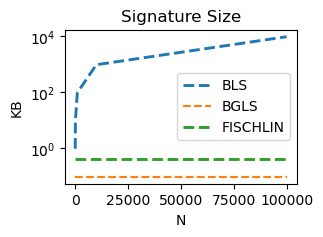

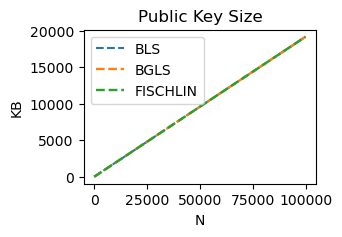

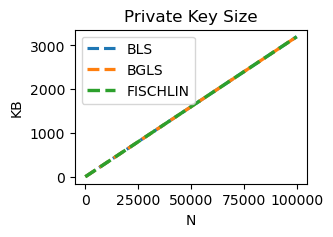

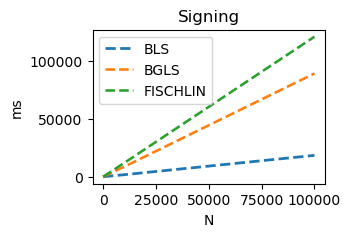

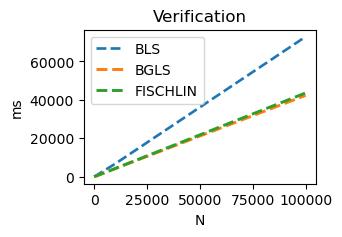

In [18]:
# Signature size a lot smaller for aggregate signatures
plot("Signature Size", "signatureSizeKB", "KB", ylog=True)

# Public and private key sizes are the same for all three schemes
plot("Public Key Size", "publicKeySizeKB", "KB")
plot("Private Key Size", "privateKeySizeKB", "KB")

# Sequential Aggregate Signatures are slower than BGLS
# But they ensure the order of signing which is needed in some applications like secure routing
plot("Signing", "timeToSign", "ms")
plot("Verification", "timeToVerify", "ms")